In [55]:
%matplotlib inline

import matplotlib.pyplot as plt

In [59]:
import numpy as np

'''
ES(µ+λ) and ES(µ,λ) algorithms

d  = chromosome length
F  = evaluation function
N  = population size
M  = number of parents in each iteration
k  = learning rate
num_iter = number of iterations
replacement = replacement method (plus or comma)

returns: a tuple (s, log) where
    s   = best solution from the last population
    log = score statistics from all iterations
'''

def mutate(parents, tau, tau0):
    d = int(parents.shape[1] / 2)
    M = parents.shape[0]
    
    eps = np.random.normal(scale=tau, size=(M, d))
    eps0 = np.random.normal(scale=tau0, size=(M, 1))
    new_sigmas = parents[:, d:] * np.exp(eps + eps0)
    eps = np.random.normal(scale=new_sigmas)
    new_xs = parents[:, :d] + eps
    
    return np.hstack([new_xs, new_sigmas])

def es(d, F, N, M, k, num_iter, replacement='plus', logging=False, log_interval=1):
    assert replacement in ['plus', 'comma']
    
    X = np.random.normal(size=(N,d)).astype(np.float32)
    S = np.ones((N,d), dtype=np.float32)
    P = np.hstack([X, S])
    
    tau = k / np.sqrt(2 * d)
    tau0 = k / np.sqrt(2 * np.sqrt(d))

    score = F(X)
    scores = []
    
    for i in xrange(num_iter):
        
        if logging and not i % log_interval:
            print 'Starting iteration {} out of {}...'.format(i + 1, num_iter)

        scores.append(np.array([score.min(), score.mean(), score.max()]))
        
        if logging and not i % log_interval:
            print 'Current population stats: \t{:.10f}, \t{:.10f}, \t{:.10f}'.format(*scores[-1])
        
        score_positive = score - score.min()
        parent_probs = score_positive / score_positive.sum()
        parents = P[np.random.choice(N, p=parent_probs, size=M)]
        
        children = mutate(parents, tau, tau0)
        
        if replacement == 'plus':
            P = np.vstack([P, children])
            score = F(P[:, :d])
            best = score.argpartition(-N)[-N:]
            P = P[best]
            score = score[best]
        
    return P[np.argmax(score)][:d], np.vstack(scores)


# zad1

In [56]:
def plot_sol(log, opt, fname=None):
    plt.plot(xrange(len(log)), log)
    if opt is not None:
        plt.plot(xrange(len(log)), [-opt]*len(log))
    if fname is not None:
        plt.savefig(fname)
    else:
        plt.show()

In [43]:
def griewank(P):
    a = (P**2).sum(axis=1) / 4000
    b = np.cos(P / np.sqrt(np.arange(1, P.shape[1] + 1))).prod(axis=1)
    return -(a - b + 1)

In [69]:
def rastrigin(P):
    A = 10
    a = A * P.shape[1]
    b = (P**2 - A * np.cos(2 * np.pi * P)).sum(axis=1)
    return -(a + b)

In [70]:
def schwefel(P):
    a = 418.9829 * P.shape[1]
    b = (P * np.sin(np.sqrt(np.abs(P)))).sum(axis=1)
    return -(a - b)

In [71]:
def ackeley(P):
    A, B, C = 20, .2, 2 * np.pi
    a = A * np.exp(-B * np.sqrt((P**2).mean(axis=1)))
    b = np.exp(np.cos(C * P).mean(axis=1))
    return -(-a - b + A + np.exp(1))

In [72]:
def michalewicz(P):
    m = 10
    a = (np.sin(P) * np.sin(np.arange(1, P.shape[1] + 1) * (P**2) / np.pi)**(2 * m)).sum(axis=1)
    return -(-a)

In [68]:
sol, log = es(200, griewank, 2000, 1000, 1, 5000, logging=True)

Starting iteration 1 out of 5000...
Current population stats: 	-1.2242351298, 	-0.9972254774, 	-0.7639236677
Starting iteration 2 out of 5000...
Current population stats: 	-1.0710813314, 	-0.9931951238, 	-0.7639236679
Starting iteration 3 out of 5000...
Current population stats: 	-1.0609786290, 	-0.9915461875, 	-0.7639236679
Starting iteration 4 out of 5000...
Current population stats: 	-1.0557053951, 	-0.9906472003, 	-0.7639236679
Starting iteration 5 out of 5000...
Current population stats: 	-1.0521182240, 	-0.9897129643, 	-0.7639236679
Starting iteration 6 out of 5000...
Current population stats: 	-1.0498294732, 	-0.9887974941, 	-0.7639236679
Starting iteration 7 out of 5000...
Current population stats: 	-1.0470410614, 	-0.9881403438, 	-0.7639236679
Starting iteration 8 out of 5000...
Current population stats: 	-1.0448804941, 	-0.9876523524, 	-0.7639236679
Starting iteration 9 out of 5000...
Current population stats: 	-1.0431394470, 	-0.9870896610, 	-0.7639236679
Starting iteration 

KeyboardInterrupt: 

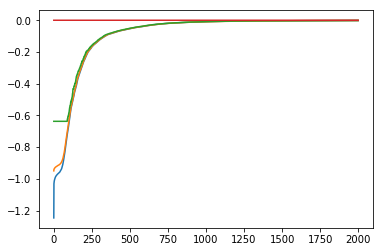

In [66]:
plot_sol(log, 0)

# zad3

In [73]:
def get_transformation(d, h):
    A = np.random.rand(d, h)
    b = np.random.rand(d)
    return A, b

In [74]:
A, b = get_transformation(50, 500)

In [82]:
def harder(fn, A=A, b=b):
    return lambda P: fn((A.dot(P.T) + b[:, np.newaxis]).T)

In [83]:
sol, log = es(500, harder(griewank), 400, 200, 1, 1000, logging=True)

Starting iteration 1 out of 1000...
Current population stats: 	-16.2936076907, 	-2.9181695096, 	-1.3374372608
Starting iteration 2 out of 1000...
Current population stats: 	-3.4391200940, 	-2.1063928602, 	-1.3374372608
Starting iteration 3 out of 1000...
Current population stats: 	-2.5885474247, 	-1.9364044914, 	-1.3374372608
Starting iteration 4 out of 1000...
Current population stats: 	-2.3765199109, 	-1.8741264508, 	-1.3374372608
Starting iteration 5 out of 1000...
Current population stats: 	-2.2724983287, 	-1.8426507129, 	-1.3374372608
Starting iteration 6 out of 1000...
Current population stats: 	-2.1777041499, 	-1.8090693485, 	-1.3374372608
Starting iteration 7 out of 1000...
Current population stats: 	-2.1206176263, 	-1.7921894815, 	-1.3374372608
Starting iteration 8 out of 1000...
Current population stats: 	-2.0641628864, 	-1.7739055556, 	-1.3374372608
Starting iteration 9 out of 1000...
Current population stats: 	-2.0130138173, 	-1.7580837840, 	-1.3374372608
Starting iteration